# Collect Video/Channel Data

In [1]:
# Reading YouTube URLs from a text file
with open(r'C:\Users\match\Documents\ytproject\videolist.txt') as file:
    urls = file.read().splitlines()

# Function to extract video ID from URL
def extract_video_id(url):
    # Splitting the URL by '/' and getting the last part
    return url.split('/')[-1]

# Extracting video IDs
video_ids = [extract_video_id(url) for url in urls]




In [3]:
!pip install google-api-python-client


In [2]:
from googleapiclient.discovery import build
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
# API
def get_api_key(file_path):
    with open(file_path, 'r') as file:
        api_key = file.readline().strip()
    return api_key

api_key_file_path = r'C:\Users\match\Documents\ytapi.txt'
developer_key = get_api_key(api_key_file_path)

# Initialize YouTube API client
youtube = build('youtube', 'v3', developerKey=developer_key)

In [5]:
def get_video_details(video_id):
    try:
        response = youtube.videos().list(
            part='snippet,statistics,contentDetails',
            id=video_id
        ).execute()

        if response['items']:
            video = response['items'][0]
            video_id = video['id']
            video_url = f"https://www.youtube.com/watch?v={video_id}"
            return {
                'title': video['snippet']['title'],
                'view_count': int(video['statistics'].get('viewCount', 0)),
                'likes': int(video['statistics'].get('likeCount', 0)),
                'comments': int(video['statistics'].get('commentCount', 0)),
                'upload_date': video['snippet']['publishedAt'],
                'channel_name': video['snippet']['channelTitle'],
                'channel_id': video['snippet']['channelId'],
                'video_length': video['contentDetails']['duration'],
                'url': video_url 
            }
        else:
            print(f"No data found for video ID: {video_id}")
            return None
    except Exception as e:
        print(f"Error processing video ID {video_id}: {e}")
        return None


# Fetch data
video_data = [get_video_details(video_id) for video_id in video_ids if video_id]

# Filter out None values
video_data = [data for data in video_data if data]

# Create Dataframe
video_df = pd.DataFrame(video_data)


No data found for video ID: NNwfK3P66gQ
No data found for video ID: 1rkpJb59n7k
No data found for video ID: v2XfBEjWlig
No data found for video ID: nzRfEn32G8k
No data found for video ID: Qrwn-sxZtpg
No data found for video ID: 1SObtBeTeiA


In [6]:
video_df

,title,view_count,likes,comments,upload_date,channel_name,channel_id,video_length,url
0,"How to Study Smarter, Not Harder: The Cambridg...",288166,12649,208,2023-08-09T16:00:01Z,Dr. Izzy Sealey,UCbOhZ3HUP0eqbQgGYSMHo1w,PT12M54S,https://www.youtube.com/watch?v=aA6WXzHTH4M
1,How to Study Consistently *Without* Burning Out,574274,28606,337,2023-07-23T15:00:08Z,Dr. Izzy Sealey,UCbOhZ3HUP0eqbQgGYSMHo1w,PT11M59S,https://www.youtube.com/watch?v=DzBzWAOzdmo
2,9 Study Techniques that got me through Cambrid...,1759748,89722,973,2022-07-02T09:00:12Z,Dr. Izzy Sealey,UCbOhZ3HUP0eqbQgGYSMHo1w,PT15M42S,https://www.youtube.com/watch?v=UPT6bguxH2s
3,The Secret to Straight A's,37664,1178,124,2016-11-26T03:13:50Z,Study To Success,UC01sF0wMt4tB2O9krpJ_8Tg,PT9M41S,https://www.youtube.com/watch?v=3Q2WFVWe9-8
4,Finals Survival Guide | How to ACE Your Finals...,16616,444,40,2016-12-22T04:32:15Z,Study To Success,UC01sF0wMt4tB2O9krpJ_8Tg,PT8M47S,https://www.youtube.com/watch?v=iwhnsmF9EYQ
...,...,...,...,...,...,...,...,...,...
879,Make Your Room Amazing! DIY Roomspiration + St...,58381,1383,53,2015-03-27T21:41:31Z,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,PT7M15S,https://www.youtube.com/watch?v=_5QlW0DrXu0
880,Highly Effective Study Tips To Get Straight A's!,43309,1437,131,2015-03-21T08:34:10Z,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,PT6M44S,https://www.youtube.com/watch?v=rV_u7Kk9AZo
881,Study Tips To ACE Your Exams! + Self-Care Stra...,43293,1408,98,2015-03-14T21:33:48Z,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,PT6M5S,https://www.youtube.com/watch?v=2QW_JH9xCy4
882,GET ORGANIZED & BEAT STRESS! Try These Easy an...,40128,1435,82,2015-03-07T21:48:38Z,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,PT6M13S,https://www.youtube.com/watch?v=M4eP0-BrmxA


In [7]:

from datetime import datetime
import isodate

# Format upload date
video_df['upload_date'] = pd.to_datetime(video_df['upload_date']).dt.date

# Format Video Length
def format_duration(duration_str):
    duration = isodate.parse_duration(duration_str)
    total_seconds = int(duration.total_seconds())
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

video_df['video_length'] = video_df['video_length'].apply(format_duration)



In [8]:
video_df

,title,view_count,likes,comments,upload_date,channel_name,channel_id,video_length,url
0,"How to Study Smarter, Not Harder: The Cambridg...",288166,12649,208,2023-08-09,Dr. Izzy Sealey,UCbOhZ3HUP0eqbQgGYSMHo1w,00:12:54,https://www.youtube.com/watch?v=aA6WXzHTH4M
1,How to Study Consistently *Without* Burning Out,574274,28606,337,2023-07-23,Dr. Izzy Sealey,UCbOhZ3HUP0eqbQgGYSMHo1w,00:11:59,https://www.youtube.com/watch?v=DzBzWAOzdmo
2,9 Study Techniques that got me through Cambrid...,1759748,89722,973,2022-07-02,Dr. Izzy Sealey,UCbOhZ3HUP0eqbQgGYSMHo1w,00:15:42,https://www.youtube.com/watch?v=UPT6bguxH2s
3,The Secret to Straight A's,37664,1178,124,2016-11-26,Study To Success,UC01sF0wMt4tB2O9krpJ_8Tg,00:09:41,https://www.youtube.com/watch?v=3Q2WFVWe9-8
4,Finals Survival Guide | How to ACE Your Finals...,16616,444,40,2016-12-22,Study To Success,UC01sF0wMt4tB2O9krpJ_8Tg,00:08:47,https://www.youtube.com/watch?v=iwhnsmF9EYQ
...,...,...,...,...,...,...,...,...,...
879,Make Your Room Amazing! DIY Roomspiration + St...,58381,1383,53,2015-03-27,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:07:15,https://www.youtube.com/watch?v=_5QlW0DrXu0
880,Highly Effective Study Tips To Get Straight A's!,43309,1437,131,2015-03-21,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:06:44,https://www.youtube.com/watch?v=rV_u7Kk9AZo
881,Study Tips To ACE Your Exams! + Self-Care Stra...,43293,1408,98,2015-03-14,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:06:05,https://www.youtube.com/watch?v=2QW_JH9xCy4
882,GET ORGANIZED & BEAT STRESS! Try These Easy an...,40128,1435,82,2015-03-07,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:06:13,https://www.youtube.com/watch?v=M4eP0-BrmxA


To iron out the issues with videos becoming private (which are removed from this list) /accidentally choosing videos with no sound (therefore giving empty transcripts), I have to make sure both lists match- first by deleting the empty transcripts, then matching the corpus folder to this list of videos.

In [27]:
import os
import re

def clean_filename(title):
    title = re.sub('[^\w\s-]', '', title)
    return re.sub('[-\s]+', '_', title).strip().lower()

# Assuming 'video_df' is your DataFrame with a 'video title' column

# Apply the clean_filename function to the video titles in the DataFrame
video_df['raw_title'] = video_df['title'].apply(clean_filename)

# List filenames in the folder (without the .txt extension)
filenames = [f.replace('.txt', '') for f in os.listdir(r"C:\Users\match\Documents\ytproject\transcripts") if f.endswith('.txt')]

# Create a DataFrame from the filenames
filenames_df = pd.DataFrame(filenames, columns=['raw_title'])

# Perform an inner join to find matches
matched_df = pd.merge(video_df, filenames_df, on='raw_title', how='inner')

# matched_df now contains only the entries that exist in both the DataFrame and the folder

In [30]:
matched_df

,title,view_count,likes,comments,upload_date,channel_name,channel_id,video_length,url,raw_title
0,"How to Study Smarter, Not Harder: The Cambridg...",288166,12649,208,2023-08-09,Dr. Izzy Sealey,UCbOhZ3HUP0eqbQgGYSMHo1w,00:12:54,https://www.youtube.com/watch?v=aA6WXzHTH4M,how_to_study_smarter_not_harder_the_cambridge_...
1,How to Study Consistently *Without* Burning Out,574274,28606,337,2023-07-23,Dr. Izzy Sealey,UCbOhZ3HUP0eqbQgGYSMHo1w,00:11:59,https://www.youtube.com/watch?v=DzBzWAOzdmo,how_to_study_consistently_without_burning_out
2,9 Study Techniques that got me through Cambrid...,1759748,89722,973,2022-07-02,Dr. Izzy Sealey,UCbOhZ3HUP0eqbQgGYSMHo1w,00:15:42,https://www.youtube.com/watch?v=UPT6bguxH2s,9_study_techniques_that_got_me_through_cambrid...
3,The Secret to Straight A's,37664,1178,124,2016-11-26,Study To Success,UC01sF0wMt4tB2O9krpJ_8Tg,00:09:41,https://www.youtube.com/watch?v=3Q2WFVWe9-8,the_secret_to_straight_as
4,Finals Survival Guide | How to ACE Your Finals...,16616,444,40,2016-12-22,Study To Success,UC01sF0wMt4tB2O9krpJ_8Tg,00:08:47,https://www.youtube.com/watch?v=iwhnsmF9EYQ,finals_survival_guide_how_to_ace_your_finals_m...
...,...,...,...,...,...,...,...,...,...,...
821,Make Your Room Amazing! DIY Roomspiration + St...,58381,1383,53,2015-03-27,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:07:15,https://www.youtube.com/watch?v=_5QlW0DrXu0,make_your_room_amazing_diy_roomspiration_study...
822,Highly Effective Study Tips To Get Straight A's!,43309,1437,131,2015-03-21,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:06:44,https://www.youtube.com/watch?v=rV_u7Kk9AZo,highly_effective_study_tips_to_get_straight_as
823,Study Tips To ACE Your Exams! + Self-Care Stra...,43293,1408,98,2015-03-14,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:06:05,https://www.youtube.com/watch?v=2QW_JH9xCy4,study_tips_to_ace_your_exams_self_care_strateg...
824,GET ORGANIZED & BEAT STRESS! Try These Easy an...,40128,1435,82,2015-03-07,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:06:13,https://www.youtube.com/watch?v=M4eP0-BrmxA,get_organized_beat_stress_try_these_easy_and_h...


In [32]:
# Assuming 'matched_df' is your DataFrame
# Remove duplicate entries based on the 'cleaned_video_title' column
matched_df = matched_df.drop_duplicates(subset='raw_title')

# Now you can check the number of unique entries in matched_df
print("Number of unique entries after removing duplicates:", len(matched_df))


Number of unique entries after removing duplicates: 812


In [38]:
def get_channel_details(channel_id):
    response = youtube.channels().list(
        part='snippet,statistics',
        id=channel_id
    ).execute()

    if response['items']:
        channel = response['items'][0]
        
        return {
            'channel_name': channel['snippet']['title'],
            'total_video_count': int(channel['statistics']['videoCount']),
            'total_views': int(channel['statistics']['viewCount']),
            'total_subs': int(channel['statistics']['subscriberCount']),
            'creation_date': channel['snippet']['publishedAt'],
        }
# Getting unique channel IDs from video data
channel_ids = video_df['channel_id'].unique()
# Fetching channel data
channel_data = [get_channel_details(channel_id) for channel_id in channel_ids]
# Creating a DataFrame for channel data
channel_df = pd.DataFrame(channel_data)


KeyError: 'channelId'

In [13]:
channel_df['creation_date'] = pd.to_datetime(channel_df['creation_date']).dt.date
channel_df

,channel_name,total_video_count,total_views,total_subs,creation_date
0,Dr. Izzy Sealey,77,18173701,550000,2014-06-03
1,Study To Success,237,196069545,1940000,2016-06-20
2,The Infographics Show,4680,5638543218,13800000,2011-02-26
3,Motivation2Study,526,315191386,4300000,2017-03-04
4,English with Emma · engVid,240,233389658,4600000,2011-12-08
...,...,...,...,...,...
95,Alicia Wong,103,14364488,197000,2017-03-18
96,Liam Porritt,150,20131637,244000,2014-04-08
97,studytee,56,71526030,1210000,2017-09-13
98,Mariana Vieira,340,60054937,769000,2015-03-16


Forgot to keep channel ID, so quickly readding them

In [45]:
unique_channels = video_df[['channel_name', 'channel_id']].drop_duplicates()

In [47]:
# Merging with channel_df
channel_df = channel_df.merge(unique_channels, on='channel_name', how='left')


In [48]:
channel_df

,channel_name,total_video_count,total_views,total_subs,creation_date,channel_id
0,Dr. Izzy Sealey,77,18173701,550000,2014-06-03,UCbOhZ3HUP0eqbQgGYSMHo1w
1,Study To Success,237,196069545,1940000,2016-06-20,UC01sF0wMt4tB2O9krpJ_8Tg
2,The Infographics Show,4680,5638543218,13800000,2011-02-26,UCfdNM3NAhaBOXCafH7krzrA
3,Motivation2Study,526,315191386,4300000,2017-03-04,UC8PICQUP0a_HsrA9S4IIgWw
4,English with Emma · engVid,240,233389658,4600000,2011-12-08,UCVBErcpqaokOf4fI5j73K_w
5,Hafu Go,301,1289325502,4530000,2017-02-08,UCXMVaxrax7RNDPdfRrXXgtQ
6,christine lee,112,10223011,131000,2014-04-21,UCUzy4w3TfWgoXTLXyXwEbHw
7,Sienna Santer,83,53542961,728000,2014-01-11,UCn6BJylSkl-Gd66qepnmHzg
8,Hannah Elise,310,74125564,798000,2013-11-17,UCT9y7nOBdqfWuaZJ_x9mPkA
9,carina,134,30608574,420000,2015-11-14,UCECGTK7DkU7I8SSfBItn3uw


In [69]:
matched_df.to_csv('yt_ml_videos.csv', index=False)
channel_df.to_csv('yt_ml_channels.csv', index=False)

In [3]:
matched_df = pd.read_csv('yt_ml_videos.csv')
channel_df = pd.read_csv('yt_ml_channels.csv')

In [65]:
matched_df = matched_df.sort_values('raw_title')

Adding Doc ID

In [67]:
matched_df['doc'] = range(len(matched_df))

In [5]:
matched_df

,title,view_count,likes,comments,upload_date,channel_name,channel_id,video_length,url,raw_title,doc
0,100% On Every Test,491718,30270,848,2023-09-12,The Math Sorcerer,UCr7lmzIk63PZnBw3bezl-Mg,00:14:29,https://www.youtube.com/watch?v=TBbUBgp0-do,100_on_every_test,0
1,10 Amazing LIFE HACKS For Studying!,150638,6192,404,2016-02-23,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:03:48,https://www.youtube.com/watch?v=T6JrwxLWZEw,10_amazing_life_hacks_for_studying,1
2,10 Back To School STUDY HACKS!,179522,5943,423,2016-08-31,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,00:05:16,https://www.youtube.com/watch?v=HRDw_PntqkU,10_back_to_school_study_hacks,2
3,10 effective study tips | studytee,1126953,32294,805,2018-03-04,studytee,UCc1QflC90Nkf_SDBZwJScDQ,00:07:11,https://www.youtube.com/watch?v=MJqmgoAF96U,10_effective_study_tips_studytee,3
4,10 habits of effective students 📚,205744,11133,320,2019-05-21,studyquill,UC-ZQaezPlUTe94-7buWtIfA,00:07:14,https://www.youtube.com/watch?v=oxnELgYDX1M,10_habits_of_effective_students_,4
...,...,...,...,...,...,...,...,...,...,...,...
807,You're Not Stupid: A Science Based System to L...,574266,37459,459,2023-10-31,Python Programmer,UC68KSmHePPePCjW4v57VPQg,00:10:40,https://www.youtube.com/watch?v=TDYa2pPMx0k,youre_not_stupid_a_science_based_system_to_lea...,807
808,You’re Not Stupid: How to Easily Learn Difficu...,2238989,126869,3269,2022-06-07,Elizabeth Filips,UCUFFHXvzAMRSD8Bq4bJppxQ,00:20:17,https://www.youtube.com/watch?v=Kz_brQBl8xk,youre_not_stupid_how_to_easily_learn_difficult...,808
809,You're not stupid: How to learn difficult thin...,183717,6308,182,2023-09-29,Python Programmer,UC68KSmHePPePCjW4v57VPQg,00:06:16,https://www.youtube.com/watch?v=QXIa0NAycGo,youre_not_stupid_how_to_learn_difficult_things...,809
810,You’re Not Stupid: How to Quickly Understand D...,76274,4412,216,2023-08-30,Elizabeth Filips,UCUFFHXvzAMRSD8Bq4bJppxQ,00:13:07,https://www.youtube.com/watch?v=6ZBz1AaUNPM,youre_not_stupid_how_to_quickly_understand_dif...,810


# Overview


Now that we've got the data, let's look at some basic info.

First, the totals:

In [77]:
matched_df['video_length'] = pd.to_timedelta(matched_df['video_length'])

total_duration = matched_df['video_length'].sum()
print(f"Total Duration of Videos: {total_duration}")

Total Duration of Videos: 5 days 11:59:39


In [17]:
total_views = matched_df['view_count'].sum()
print(f"Total Views of Videos: {total_views:,}")

Total Views of Videos: 402,309,751


First and Last

In [6]:

matched_df['upload_date'] = pd.to_datetime(matched_df['upload_date'])


oldest_channel = matched_df.loc[matched_df['upload_date'].idxmin()]['channel_name']
newest_channel = matched_df.loc[matched_df['upload_date'].idxmax()]['channel_name']
print(f"Oldest Channel: {oldest_channel}, Newest Channel: {newest_channel}")


oldest_video = matched_df.loc[matched_df['upload_date'].idxmin()]['title']
newest_video = matched_df.loc[matched_df['upload_date'].idxmax()]['title']
print(f"Oldest Video: {oldest_video}, Newest Video: {newest_video}")

Oldest Channel: Scott Young, Newest Channel: jspark
Oldest Video: Learn Faster, Newest Video: This SECRET makes STUDYING FUN and EFFORTLESS


### Top Five Best Study Tips Channels!!!! not
Since a good amount of these videos are just as , might as well go in theme

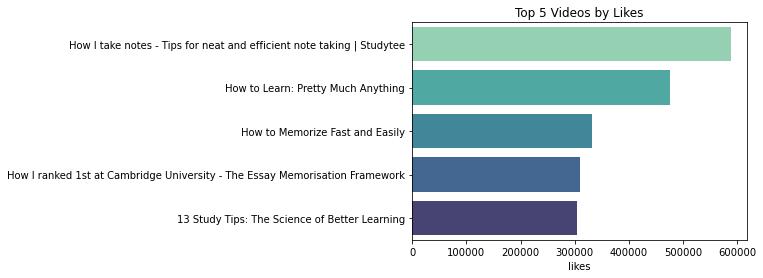

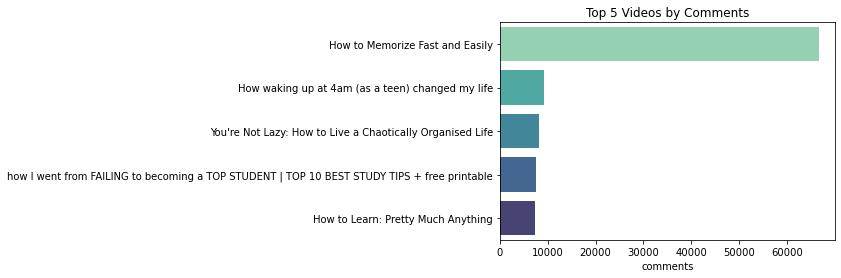

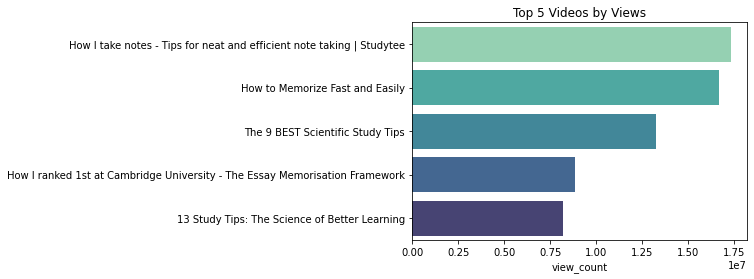

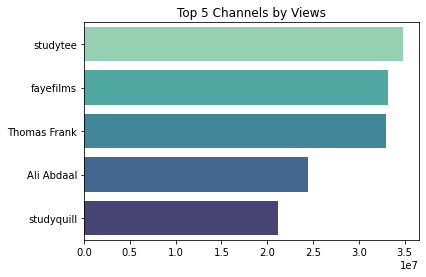

In [70]:

def plot_top5(column, title, color_palette):
    top5 = matched_df.nlargest(5, column)
    sns.barplot(x=column, y='title', data=top5, palette=color_palette)
    plt.title(title)
    plt.ylabel('') 
    plt.show()


color_palette = sns.color_palette("mako_r")

# Top Five
plot_top5('likes', 'Top 5 Videos by Likes', color_palette)
plot_top5('comments', 'Top 5 Videos by Comments', color_palette)
plot_top5('view_count', 'Top 5 Videos by Views', color_palette)


top5_channels_views = matched_df.groupby('channel_name')['view_count'].sum().nlargest(5)
sns.barplot(y=top5_channels_views.index, x=top5_channels_views.values, palette=color_palette)
plt.title('Top 5 Channels by Views')
plt.ylabel('') 
plt.show()



# Total Videos

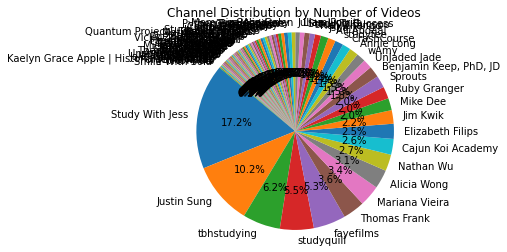

In [71]:

# 7. Pie Chart of Channels by Number of Videos
channel_video_count = matched_df['channel_name'].value_counts()
plt.pie(channel_video_count, labels=channel_video_count.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Channel Distribution by Number of Videos')
plt.show()

# Word Cloud for Titles


In [15]:
import re

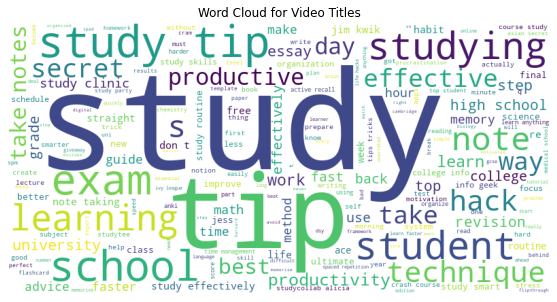

In [21]:
# Function to preprocess and tokenize the titles
def preprocess_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove unwanted characters and tokenize
    tokens = re.findall(r'\w+', text)
    return ' '.join(tokens)

# Combine all video titles into a single string and preprocess
all_titles = ' '.join(matched_df['title'].tolist())
processed_titles = preprocess_and_tokenize(all_titles)

# Generate a word cloud with the processed titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_titles)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Video Titles')
plt.show()


## How many clickbait-esque titles are there?
Ok maybe that's a bit unfair as you kind of need these to attract viewership. 
But how about if we compare say those that say BEST vs simply 5 study tips?

search titles that say Most, Best, Top

In [85]:


clickbait_keywords = ['best', 'most', 'top', 'greatest','ultimate','secret','never']


def is_clickbaity(title):
    return any(keyword in title.lower() for keyword in clickbait_keywords)

# Identify and Filter
matched_df['is_clickbaity'] = matched_df['title'].apply(is_clickbaity)
clickbaity_videos = matched_df[matched_df['is_clickbaity']]


# Calculate proportion
channels_clickbait_proportion = (clickbaity_videos.groupby('channel_name').size() / 
                                 matched_df.groupby('channel_name').size()).reset_index(name='clickbait_proportion')

# Sort by highest proportion and then by count of videos (ascending)
channels_clickbait_proportion = channels_clickbait_proportion.sort_values(by=['clickbait_proportion', 'size'], 
                                                                         ascending=[False, True])

# Rename the 'size' column to 'video_count' for clarity
channels_clickbait_proportion = channels_clickbait_proportion.rename(columns={'size': 'video_count'})



KeyError: 'size'

# Top Ten Clickbait Videos

Let's remember these channels for later, when we look at their content!

First we have the top ten by views

In [84]:
clickbaity_videos.sort_values(by='view_count', ascending=False).head(10)

,title,view_count,likes,comments,upload_date,channel_name,channel_id,video_length,url,raw_title,doc,is_clickbaity
470,The 9 BEST Scientific Study Tips,13272994,262245,6523,2015-09-03,AsapSCIENCE,UCC552Sd-3nyi_tk2BudLUzA,00:03:26,https://www.youtube.com/watch?v=p60rN9JEapg,the_9_best_scientific_study_tips,653,True
239,How to Study Effectively for School or College [Top 6 Science-Based Study Skills],3988069,90016,1368,2016-12-15,Memorize Academy,UCGGtl3nZmwzcfwHY4ck_G0Q,00:08:28,https://www.youtube.com/watch?v=CPxSzxylRCI,how_to_study_effectively_for_school_or_college_top_6_science_based_study_skills,404,True
375,The Most Powerful Way to Remember What You Study,3749210,110295,1870,2016-08-11,Thomas Frank,UCG-KntY7aVnIGXYEBQvmBAQ,00:07:47,https://www.youtube.com/watch?v=eVajQPuRmk8,the_most_powerful_way_to_remember_what_you_study,675,True
269,LAST MINUTE EXAM TIPS to SAVE YOUR GRADES (stop crying from stress bestie) 💪,3280314,166523,4676,2022-02-26,fayefilms,UCsJfDna-9xsG-NmM0kwgEkg,00:09:03,https://www.youtube.com/watch?v=PK13RFf64vk,last_minute_exam_tips_to_save_your_grades_stop_crying_from_stress_bestie_,492,True
376,How to Take Notes in Class: The 5 Best Methods - College Info Geek,2210420,49660,1004,2014-10-09,Thomas Frank,UCG-KntY7aVnIGXYEBQvmBAQ,00:06:40,https://www.youtube.com/watch?v=AffuwyJZTQQ,how_to_take_notes_in_class_the_5_best_methods_college_info_geek,459,True
274,how I went from FAILING to becoming a TOP STUDENT | TOP 10 BEST STUDY TIPS + free printable,2114756,141850,7452,2022-08-23,fayefilms,UCsJfDna-9xsG-NmM0kwgEkg,00:14:11,https://www.youtube.com/watch?v=XLw9WJrMBuk,how_i_went_from_failing_to_becoming_a_top_student_top_10_best_study_tips_free_printable,261,True
303,the ASIAN SECRET to STUDYING EFFECTIVELY,1921450,126549,1297,2023-08-22,jspark,UCc_B2QPi8lbTeCtmMAHXp2A,00:09:34,https://www.youtube.com/watch?v=ZfF2KPazvH4,the_asian_secret_to_studying_effectively,661,True
148,The Ultimate Mind Map Tutorial (How To Take Notes),1393892,47035,771,2022-06-03,Cajun Koi Academy,UCBX_-ls-dXuhFNSWSXcHrTA,00:11:58,https://www.youtube.com/watch?v=g7j_CoKD1Xs,the_ultimate_mind_map_tutorial_how_to_take_notes,701,True
245,"How to memorize anything FAST, EASILY and ACCURATELY | + best ESSAY tips",1326654,60361,1264,2020-08-23,fayefilms,UCsJfDna-9xsG-NmM0kwgEkg,00:06:48,https://www.youtube.com/watch?v=Zxoq2PKTljU,how_to_memorize_anything_fast_easily_and_accurately_best_essay_tips,355,True
167,The SECRET to Straight A's NO MATTER WHAT,1117582,74060,1256,2023-09-09,wAmy,UCb9fs9s67BXlX7rXVzRf5cQ,00:18:16,https://www.youtube.com/watch?v=73P5nFiAUkE,the_secret_to_straight_as_no_matter_what,691,True


In [78]:
top_clickbaity_titles = clickbaity_videos.sort_values(by='view_count', ascending=False)['title'].head(10)

In [82]:
pd.set_option('display.max_colwidth', None)
top_clickbaity_titles

470                                                               The 9 BEST Scientific Study Tips
239              How to Study Effectively for School or College [Top 6 Science-Based Study Skills]
375                                               The Most Powerful Way to Remember What You Study
269                   LAST MINUTE EXAM TIPS to SAVE YOUR GRADES (stop crying from stress bestie) 💪
376                             How to Take Notes in Class: The 5 Best Methods - College Info Geek
274    how I went from FAILING to becoming a TOP STUDENT | TOP 10 BEST STUDY TIPS + free printable
303                                                       the ASIAN SECRET to STUDYING EFFECTIVELY
148                                             The Ultimate Mind Map Tutorial (How To Take Notes)
245                       How to memorize anything FAST, EASILY and ACCURATELY | + best ESSAY tips
167                                                      The SECRET to Straight A's NO MATTER WHAT
Name: titl

# Top Ten Clickbait Channels

In [74]:
channels_clickbait_proportion.head(10)

,channel_name,clickbait_proportion
45,Miss Angler,1.000000
4,Anthony Zhang,1.000000
80,filmsbyand :),1.000000
11,Collin The Chad,1.000000
76,dreamyy,1.000000
41,Melvin Fung,1.000000
25,IamJustOlena,1.000000
84,jspark,0.700000
61,Study With Britney,0.666667
31,Julian Lin,0.666667


In [25]:

# Assuming 'matched_df' is your DataFrame

# List of clickbait keywords
best_keywords = ['best']

# Function to check if title is clickbaity
def is_best(title):
    return any(keyword in title.lower() for keyword in best_keywords)

# Identify clickbaity videos
matched_df['is_best'] = matched_df['title'].apply(is_best)

# Filter clickbaity videos
best_videos = matched_df[matched_df['is_best']]


In [26]:
best_videos.sort_values(by='view_count', ascending=False).head(10)

,title,view_count,likes,comments,upload_date,channel_name,channel_id,video_length,url,cleaned_video_title,is_clickbaity,is_best
470,The 9 BEST Scientific Study Tips,13272994,262245,6523,2015-09-03,AsapSCIENCE,UCC552Sd-3nyi_tk2BudLUzA,0 days 00:03:26,https://www.youtube.com/watch?v=p60rN9JEapg,the_9_best_scientific_study_tips,True,True
269,LAST MINUTE EXAM TIPS to SAVE YOUR GRADES (sto...,3280314,166523,4676,2022-02-26,fayefilms,UCsJfDna-9xsG-NmM0kwgEkg,0 days 00:09:03,https://www.youtube.com/watch?v=PK13RFf64vk,last_minute_exam_tips_to_save_your_grades_stop...,True,True
376,How to Take Notes in Class: The 5 Best Methods...,2210420,49660,1004,2014-10-09,Thomas Frank,UCG-KntY7aVnIGXYEBQvmBAQ,0 days 00:06:40,https://www.youtube.com/watch?v=AffuwyJZTQQ,how_to_take_notes_in_class_the_5_best_methods_...,True,True
274,how I went from FAILING to becoming a TOP STUD...,2114756,141850,7452,2022-08-23,fayefilms,UCsJfDna-9xsG-NmM0kwgEkg,0 days 00:14:11,https://www.youtube.com/watch?v=XLw9WJrMBuk,how_i_went_from_failing_to_becoming_a_top_stud...,True,True
245,"How to memorize anything FAST, EASILY and ACCU...",1326654,60361,1264,2020-08-23,fayefilms,UCsJfDna-9xsG-NmM0kwgEkg,0 days 00:06:48,https://www.youtube.com/watch?v=Zxoq2PKTljU,how_to_memorize_anything_fast_easily_and_accur...,True,True
21,BEST NOTE TAKING METHOD from a 4.0 Student,758050,25582,499,2019-08-30,IamJustOlena,UCXyp4JB_NONE11vAhaEzdbw,0 days 00:13:25,https://www.youtube.com/watch?v=yXVnpsiC0I4,best_note_taking_method_from_a_40_student,True,True
25,Tier Ranking Study Techniques: What is the BES...,669109,34320,491,2022-08-21,UnJaded Jade,UC4-uObu-mfafJyxxZFEwbvQ,0 days 00:09:48,https://www.youtube.com/watch?v=JQI7SvS6g1M,tier_ranking_study_techniques_what_is_the_best...,True,True
27,The Best Way to Make Effective Flashcards ~ Ad...,432701,22846,672,2018-05-02,UnJaded Jade,UC4-uObu-mfafJyxxZFEwbvQ,0 days 00:10:31,https://www.youtube.com/watch?v=duHSfvNQpY0,the_best_way_to_make_effective_flashcards_advi...,True,True
791,BEST Tricks for Learning Information FAST! |Ba...,292821,5087,324,2015-08-07,Study With Jess,UCLE6bDbrn5kNG94-1VlH_XA,0 days 00:06:36,https://www.youtube.com/watch?v=gx95-AezAps,best_tricks_for_learning_information_fast_back...,True,True
547,How I Take Notes: the Best Note Taking Method ...,247848,9599,330,2022-10-24,Jim Kwik,UCIm6PH37h6wUs_q7GR0LNtw,0 days 00:11:20,https://www.youtube.com/watch?v=RfnLqdllftk,how_i_take_notes_the_best_note_taking_method_j...,True,True
